In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
c = sns.plotting_context('poster')
c['figure.figsize'] = np.array([10.66, 10.66])
c['axes.titlesize'] = 22

sns.set_context(c)
sns.set_style('whitegrid')

sns.plotting_context()

{'axes.labelsize': 17.6,
 'axes.titlesize': 22.0,
 'figure.figsize': [10.66, 10.66],
 'font.size': 19.200000000000003,
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8000000000000003,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.200000000000001,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 16.0,
 'xtick.major.pad': 11.200000000000001,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 16.0,
 'ytick.major.pad': 11.200000000000001,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8}

In [3]:
label_loc = (-.1, 1.05)

In [4]:
pd.set_option('display.max_columns', 999)

# Data

In [5]:
ai = pd.read_csv('../../output/all_cis_calls_sbs.csv')
ai.head()

,line,fusion_id,q5_mean_theta_V,flag_AI_V,mean_apn_V,cis_tester_V,cis_line_V,trans_tester_V,trans_line_V,exon_id,chrom,start,end,Exon_Gene_ID,exon_name,start_exon,end_exon,strand,FBtr,FBtrs_per_exon,FBgn,FBpp,symbol,q5_mean_theta_M,flag_AI_M,mean_apn_M,cis_tester_M,cis_line_M,trans_tester_M,trans_line_M,flag_AI_both
0,r101,F10005_SI,0.461,1,99.704666,-2.566667,74.433333,2.566667,14.933333,FBgn0263198:1,2L,19045355,19047047,FBgn0263198,Acn:1,19045355,19045436,+,FBtr0081145,1,FBgn0263198,FBpp0080689,Acn,0.475,0,29.523922,6.666667,28.666667,-6.666667,-448.133333,0
1,r101,F10136_SI,0.673,1,194.969600,26.458333,-216.541667,-26.458333,543.416667,FBgn0032773:1,2L,19383138,19383762,FBgn0032773,fon:1,19383138,19383762,-,FBtr0081222,1,FBgn0032773,FBpp0080763,fon,0.812,1,94.156800,30.791667,-160.208333,-30.791667,-217.000000,1
2,r101,F10268_SI,0.652,1,223.617225,-14.404762,-269.404762,14.404762,787.095238,FBgn0032797:20,2L,19516441,19516858,FBgn0032797,CG10186:20,19516441,19516708,-,FBtr0299519,1,FBgn0032797,FBpp0288794,CG10186,0.667,1,67.062201,-13.904762,-79.904762,13.904762,-42.761905,1
3,r101,F10317_SI,0.087,1,89.910504,-535.277778,81.722222,535.277778,-6.555556,FBgn0041180:8,2L,19553970,19556092,FBgn0041180,TepIV:8,19553970,19556092,+,FBtr0331329,2,FBgn0041180,FBpp0303747,Tep4,0.110,1,32.648139,-529.222222,-326.222222,529.222222,-68.888889,1
4,r101,F10806_SI,0.540,0,77.254902,17.727273,13.727273,-17.727273,-4.000000,FBgn0032889:10,2L,20825272,20826087,FBgn0032889,CG9331:10,20825659,20826087,+,FBtr0081419,1,FBgn0032889,FBpp0080948,CG9331,0.596,0,40.588235,32.090909,22.090909,-32.090909,-73.909091,0


In [6]:
cis = pd.read_csv('../../output/cis_trans_estimates_v13.csv')
cis.head()

,line,mating_status,fusion_id,c_i,T_i_1a,direction_cis,direction_trans
0,r101,M,F10005_SI,0.015110,-0.102055,+,-
1,r280,M,F10005_SI,-0.016232,-0.074091,-,-
2,r315,M,F10005_SI,0.013276,0.043337,+,+
3,r324,M,F10005_SI,0.026424,-0.094715,+,-
4,r335,M,F10005_SI,-0.003652,0.013276,-,+


In [7]:
cis_sbs = cis.set_index(['line', 'fusion_id', 'mating_status']).unstack()
cis_sbs.columns = ['_'.join(col).strip() for col in cis_sbs.columns.values]
cis_sbs.reset_index(inplace=True)
cis_sbs.head()

,line,fusion_id,c_i_M,c_i_V,T_i_1a_M,T_i_1a_V,direction_cis_M,direction_cis_V,direction_trans_M,direction_trans_V
0,r101,F10005_SI,0.015110,0.011119,-0.102055,-0.145072,+,+,-,-
1,r101,F10136_SI,-0.121215,-0.066868,-0.191387,-0.186385,-,-,-,-
2,r101,F10268_SI,-0.131450,-0.148180,-0.077010,0.033401,-,-,-,+
3,r101,F10317_SI,-0.073531,-0.060299,-0.015775,-0.019112,-,-,-,-
4,r101,F10806_SI,0.014641,0.016715,-0.046448,-0.060373,+,+,-,-


In [8]:
variance = pd.read_csv('../../output/cis_trans_variance_data.csv')
variance.head()

,fusion_id,mating_status,_TYPE_,_FREQ_,cis_mean,cis_var,trans_mean,trans_var
0,F10005_SI,M,0,30,-5.088520e-18,0.002082,4.996004e-17,0.012162
1,F10005_SI,V,0,30,9.251859e-19,0.002505,1.572816e-17,0.011850
2,F10060_SI,M,0,29,4.785444e-18,0.007676,7.608856e-17,0.046955
3,F10060_SI,V,0,29,3.828355e-18,0.006663,5.168280e-17,0.042054
4,F10136_SI,M,0,24,4.047688e-18,0.015051,4.625929e-18,0.019418


In [9]:
r2_data = pd.read_csv('../../output/cis_trans_r2_data.csv')
r2_data.head()

,fusion_id,mating_status,R2_full,R2_noint,R2_cis,R2_diff_int,R2_diff_trans
0,F10005_SI,M,0.9841,0.9632,0.9637,0.0209,-0.0005
1,F10005_SI,V,0.9636,0.8875,0.8487,0.0761,0.0388
2,F10060_SI,M,0.8104,0.7341,0.6474,0.0763,0.0867
3,F10060_SI,V,0.8600,0.8272,0.7507,0.0328,0.0765
4,F10136_SI,M,0.9046,0.9046,0.8673,0.0000,0.0373


In [10]:
r2_data_sbs = r2_data.set_index(['fusion_id', 'mating_status']).unstack()
r2_data_sbs.columns = ['_'.join(col).strip() for col in r2_data_sbs.columns.values]
r2_data_sbs.reset_index(inplace=True)
r2_data_sbs.head()

,fusion_id,R2_full_M,R2_full_V,R2_noint_M,R2_noint_V,R2_cis_M,R2_cis_V,R2_diff_int_M,R2_diff_int_V,R2_diff_trans_M,R2_diff_trans_V
0,F10005_SI,0.9841,0.9636,0.9632,0.8875,0.9637,0.8487,0.0209,0.0761,-0.0005,0.0388
1,F10060_SI,0.8104,0.8600,0.7341,0.8272,0.6474,0.7507,0.0763,0.0328,0.0867,0.0765
2,F10136_SI,0.9046,0.9369,0.9046,0.9313,0.8673,0.9166,0.0000,0.0056,0.0373,0.0147
3,F10268_SI,0.9757,0.9740,0.9726,0.9549,0.9727,0.9538,0.0031,0.0191,-0.0001,0.0011
4,F10317_SI,0.8816,0.9078,0.8812,0.8579,0.0884,0.1466,0.0004,0.0499,0.7928,0.7113


# Figure 2

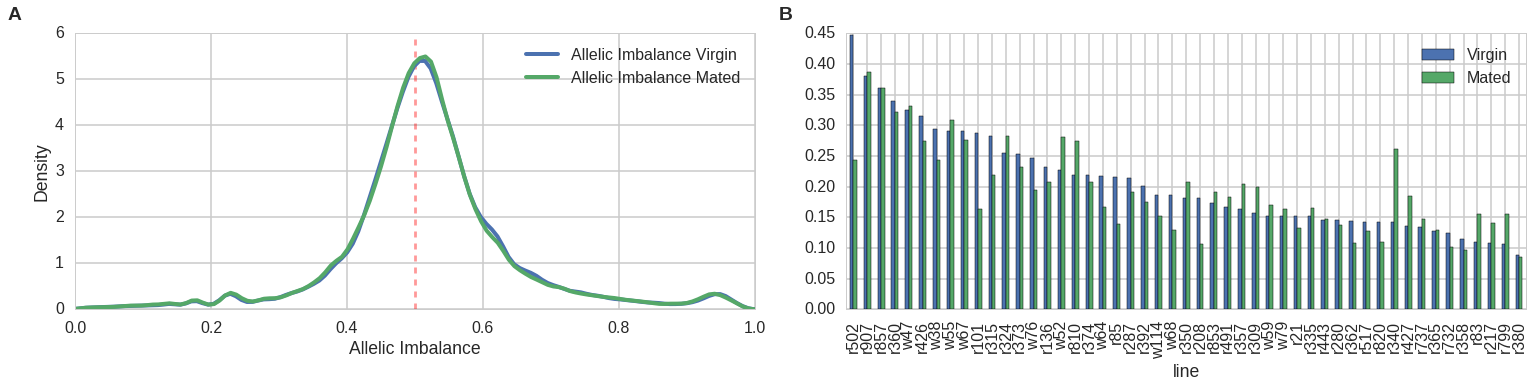

In [11]:
def giveProp(x):
    V = x.flag_AI_V.sum() / x.flag_AI_V.count()
    M = x.flag_AI_M.sum() / x.flag_AI_M.count()
    return pd.Series(data=[V, M], index=['Virgin', 'Mated'])

grp = ai.groupby('line')
propAI = grp.apply(giveProp)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21.83, 6))
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10.66, 10.66))
ax1.axvline(0.5, color='r', alpha=0.4, ls='--')
sns.distplot(ai.q5_mean_theta_V, ax=ax1, hist=False, kde_kws={'lw': 4}, label='Allelic Imbalance Virgin')
sns.distplot(ai.q5_mean_theta_M, ax=ax1, hist=False, kde_kws={'lw': 4}, label='Allelic Imbalance Mated')
ax1.set_xlim(0,1)
ax1.set_xlabel('Allelic Imbalance')
ax1.set_ylabel('Density')

propAI.sort_values(by='Virgin', inplace=True, ascending=False)
propAI.plot.bar(ax=ax2)

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')

plt.tight_layout(pad=2)
plt.savefig('../../output/AI_density.eps')

# Figure 3

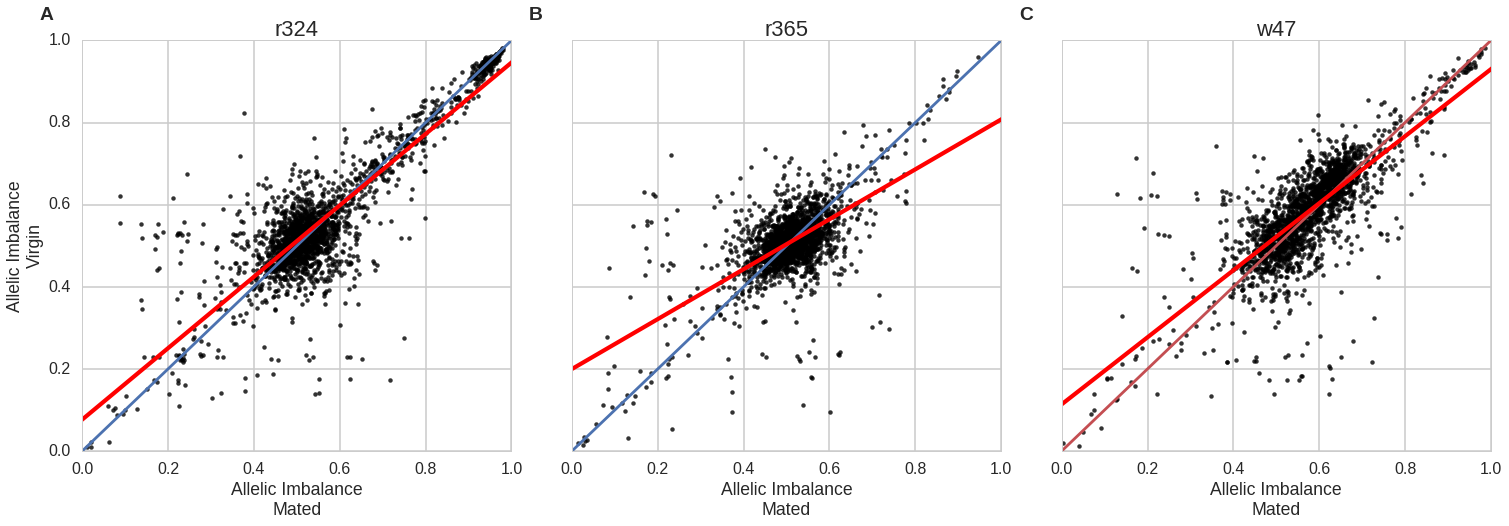

In [41]:
r324 = ai[ai.line == 'r324']
r365 = ai[ai.line == 'r365']
w47 = ai[ai.line == 'w47']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(21.83, 8))
ax1.plot([0, 1], [0, 1])
sns.regplot(r324.q5_mean_theta_M, r324.q5_mean_theta_V, ax=ax1, ci=None, line_kws={'color': 'r'}, scatter_kws={'c': 'k'})
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_title('r324')
ax1.set_ylabel('Allelic Imbalance\nVirgin')
ax1.set_xlabel('Allelic Imbalance\nMated')

ax2.plot([0, 1], [0, 1])
sns.regplot(r365.q5_mean_theta_M, r365.q5_mean_theta_V, ax=ax2, ci=None, line_kws={'color': 'r'}, scatter_kws={'c': 'k'})
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_title('r365')
ax2.set_xlabel('Allelic Imbalance\nMated')
ax2.set_ylabel('')

ax3.plot([0, 1], [0, 1])
sns.regplot(w47.q5_mean_theta_M, w47.q5_mean_theta_V, ax=ax3, ci=None, line_kws={'color': 'r'}, scatter_kws={'c': 'k'})
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_title('w47')
ax3.set_ylabel('')
ax3.set_xlabel('Allelic Imbalance\nMated')

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')
ax3.text(label_loc[0], label_loc[1], 'C', transform=ax3.transAxes, fontweight='bold')

plt.tight_layout(pad=2)
plt.savefig('../../output/AI_mated_vs_virgin_3Lines.eps')

# Figure 4

In [11]:
cisM = cis[cis.mating_status == 'M']
cisV = cis[cis.mating_status == 'V']

varianceM = variance[variance.mating_status == 'M']
varianceV = variance[variance.mating_status == 'V']

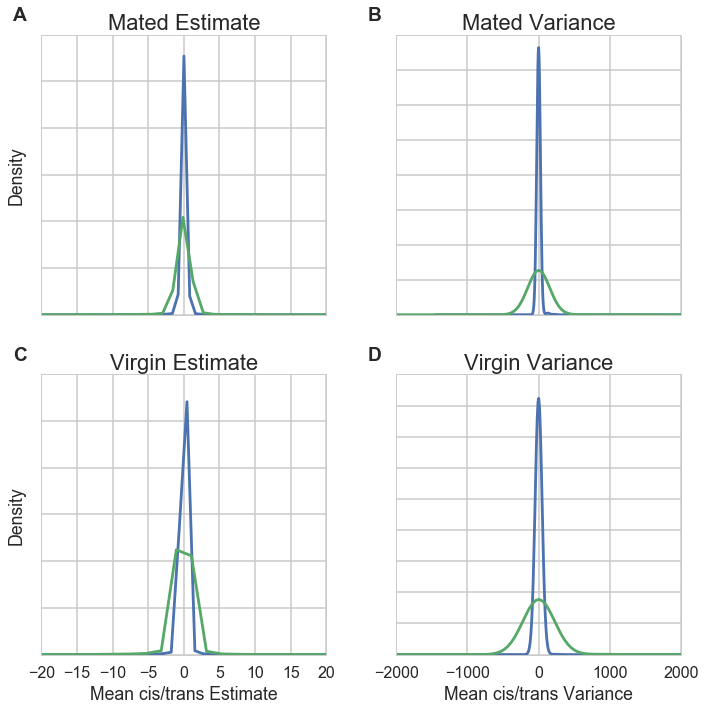

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.set_title('Mated Estimate')
cisM.c_i.plot(kind='kde', ax=ax1, xlim=(-20, 20), label='cis')
cisM.T_i_1a.plot(kind='kde', ax=ax1, label='trans')

ax2.set_title('Mated Variance')
varianceM.cis_var.plot(kind='kde', ax=ax2, xlim=(-2000, 2000), label='cis')
varianceM.trans_var.plot(kind='kde', ax=ax2, label='trans')

ax3.set_title('Virgin Estimate')
cisV.c_i.plot(kind='kde', ax=ax3, xlim=(-20, 20), label='cis')
cisV.T_i_1a.plot(kind='kde', ax=ax3, label='trans')

ax4.set_title("Virgin Variance")
varianceV.cis_var.plot(kind='kde', ax=ax4, xlim=(-2000, 2000), label='cis')
varianceV.trans_var.plot(kind='kde', ax=ax4, label='trans')

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')
ax3.text(label_loc[0], label_loc[1], 'C', transform=ax3.transAxes, fontweight='bold')
ax4.text(label_loc[0], label_loc[1], 'D', transform=ax4.transAxes, fontweight='bold')

_ = ax1.set_xticklabels('')
_ = ax2.set_xticklabels('')

_ = ax1.set_yticklabels('')
_ = ax2.set_yticklabels('')
_ = ax3.set_yticklabels('')
_ = ax4.set_yticklabels('')

_ = ax2.set_xticks([-2000, -1000, 0, 1000, 2000])
_ = ax4.set_xticks([-2000, -1000, 0, 1000, 2000])

_ = ax3.set_xlabel('Mean cis/trans Estimate')
_ = ax4.set_xlabel('Mean cis/trans Variance')

_ = ax2.set_ylabel('')
_ = ax4.set_ylabel('')

plt.tight_layout(pad=2)
plt.savefig('../../output/estimate_and_variance_distribution.eps')

# Figure 5

In [15]:
his3b = 'F15445_SI'

In [16]:
hai = cis_sbs[cis_sbs.fusion_id == his3b]
hai.head()

,line,fusion_id,c_i_M,c_i_V,T_i_1a_M,T_i_1a_V,direction_cis_M,direction_cis_V,direction_trans_M,direction_trans_V
19,r101,F15445_SI,-0.009379,-0.001429,0.038229,0.009158,-,-,+,+
574,r136,F15445_SI,0.003075,-0.025488,-0.003268,0.060623,+,-,-,+
1045,r208,F15445_SI,-0.016722,0.000605,0.061521,0.062951,-,+,+,+
1571,r21,F15445_SI,-0.001642,-0.003071,-0.158603,-0.151207,-,-,-,-
1950,r217,F15445_SI,-0.008359,-0.001297,0.042858,0.074296,-,-,+,+


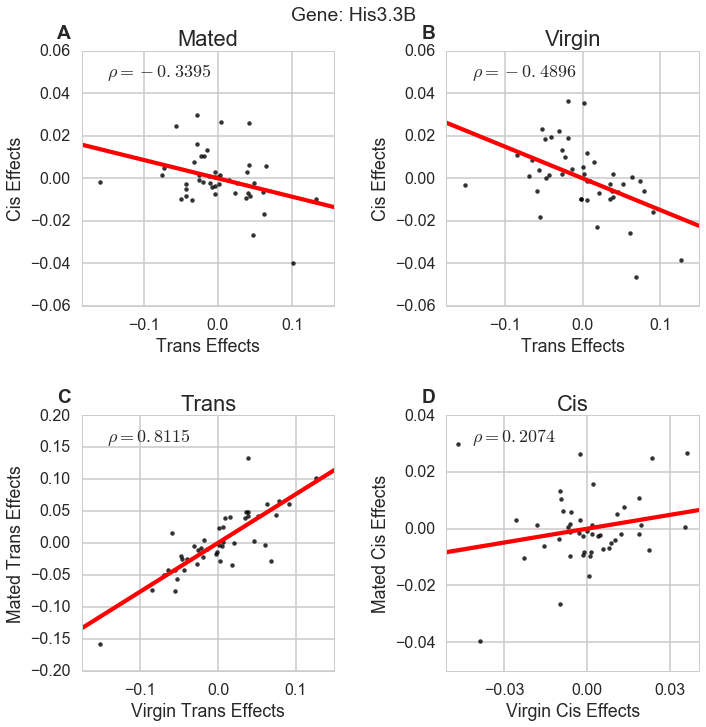

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#hai[['T_i_1a_M', 'c_i_M']].corr()

ax1.set_xticks([-.20, -.10, 0, .10, .20])
ax2.set_xticks([-.20, -.10, 0, .10, .20])
ax3.set_xticks([-.20, -.10, 0, .10, .20])
ax4.set_xticks([-.06, -.03, 0, .03, .06])

ax1.set_title('Mated')
sns.regplot(hai.T_i_1a_M, hai.c_i_M, ax=ax1, ci=False, line_kws={'color': 'r'}, scatter_kws={'color': 'k'})
cc = round(hai[['T_i_1a_M', 'c_i_M']].corr(), 4)
ax1.text(.1, .9, r'$\rho = {}$'.format(cc.values[0,1]), transform=ax1.transAxes, fontsize=18)

ax2.set_title('Virgin')
sns.regplot(hai.T_i_1a_V, hai.c_i_V, ax=ax2, ci=False, line_kws={'color': 'r'}, scatter_kws={'color': 'k'})
cc = round(hai[['T_i_1a_V', 'c_i_V']].corr(), 4)
ax2.text(.1, .9, r'$\rho = {}$'.format(cc.values[0,1]), transform=ax2.transAxes, fontsize=18)

ax3.set_title('Trans')
sns.regplot(hai.T_i_1a_V, hai.T_i_1a_M, ax=ax3, ci=False, line_kws={'color': 'r'}, scatter_kws={'color': 'k'})
cc = round(hai[['T_i_1a_V', 'T_i_1a_M']].corr(), 4)
ax3.text(.1, .9, r'$\rho = {}$'.format(cc.values[0,1]), transform=ax3.transAxes, fontsize=18)

ax4.set_title('Cis')
sns.regplot(hai.c_i_V, hai.c_i_M, ax=ax4, ci=False, line_kws={'color': 'r'}, scatter_kws={'color': 'k'})
cc = round(hai[['c_i_V', 'c_i_M']].corr(), 4)
ax4.text(.1, .9, r'$\rho = {}$'.format(cc.values[0,1]), transform=ax4.transAxes, fontsize=18)

ax1.set_xlabel('Trans Effects')
ax1.set_ylabel('Cis Effects')

ax2.set_xlabel('Trans Effects')
ax2.set_ylabel('Cis Effects')

ax3.set_xlabel('Virgin Trans Effects')
ax3.set_ylabel('Mated Trans Effects')

ax4.set_xlabel('Virgin Cis Effects')
ax4.set_ylabel('Mated Cis Effects')

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')
ax3.text(label_loc[0], label_loc[1], 'C', transform=ax3.transAxes, fontweight='bold')
ax4.text(label_loc[0], label_loc[1], 'D', transform=ax4.transAxes, fontweight='bold')

fig.suptitle('Gene: His3.3B')

plt.tight_layout(pad=2)
plt.savefig('../../output/His3.3B_estimate_and_variance_distribution.eps')

# Figure 6

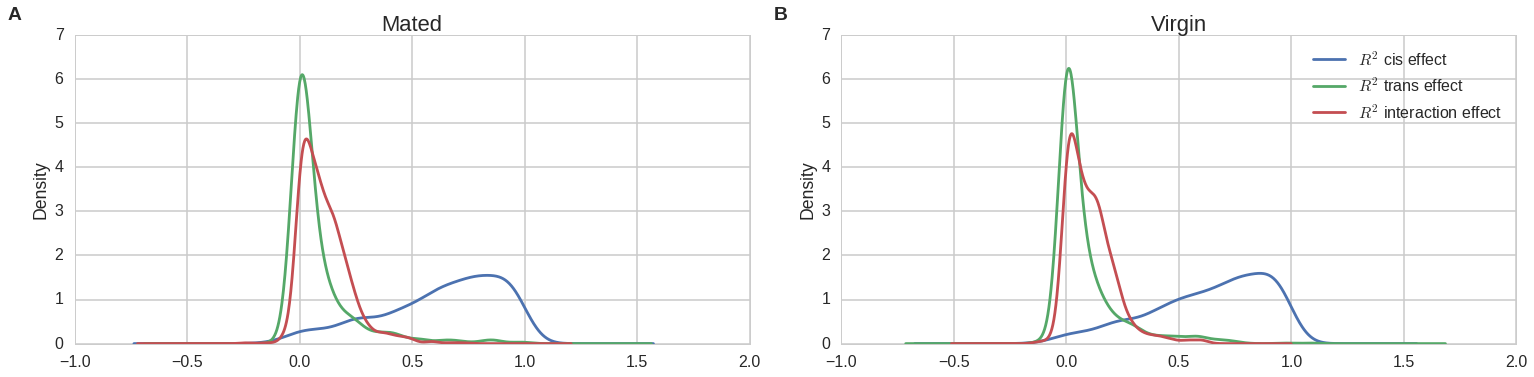

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21.83, 6))

r2_data_sbs.R2_cis_M.plot(kind='kde', label=r'$R^2$ cis effect', ax=ax1)
r2_data_sbs.R2_diff_trans_M.plot(kind='kde', label=r'$R^2$ trans effect', ax=ax1)
r2_data_sbs.R2_diff_int_M.plot(kind='kde', label=r'$R^2$ interaction effect', ax=ax1)
ax1.set_title('Mated')

r2_data_sbs.R2_cis_V.plot(kind='kde', label=r'$R^2$ cis effect', ax=ax2)
r2_data_sbs.R2_diff_trans_V.plot(kind='kde', label=r'$R^2$ trans effect', ax=ax2)
r2_data_sbs.R2_diff_int_V.plot(kind='kde', label=r'$R^2$ interaction effect', ax=ax2)
ax2.set_title('Virgin')
plt.legend()

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')

plt.tight_layout(pad=2)
plt.savefig('../../output/cis_trans_int_effects_distribution.eps')

# Figure 7

In [48]:
ai.shape

(65360, 31)

In [49]:
cis_sbs.shape

(26940, 10)

In [50]:
merged = cis_sbs.merge(ai, on=['line', 'fusion_id'], how='inner')
merged['int_V'] = cis_sbs.c_i_V * cis_sbs.T_i_1a_V

In [51]:
men = merged[merged.fusion_id == 'S52856_SI']
cho = merged[merged.fusion_id == 'S13419_SI']
cg = merged[merged.fusion_id == 'S2713_SI']

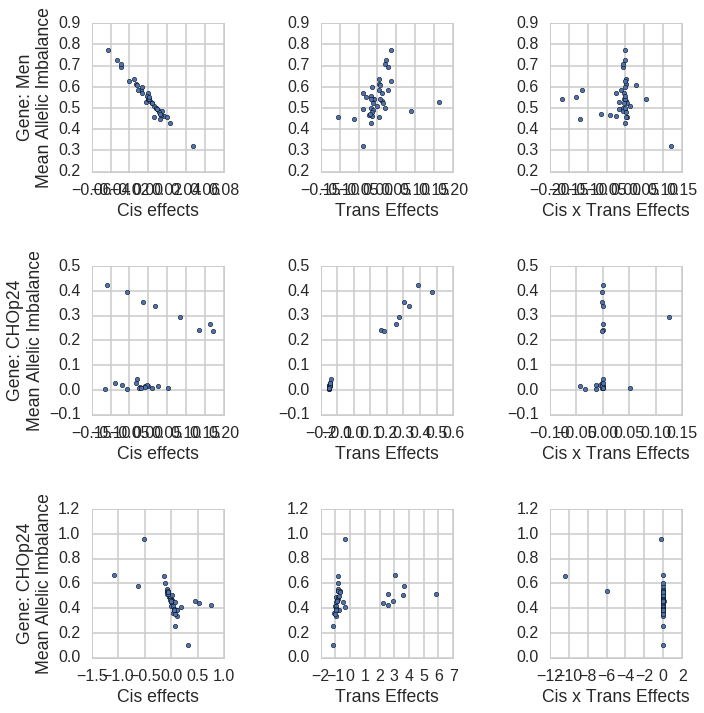

In [54]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
men.plot('c_i_V', 'q5_mean_theta_V', kind='scatter', ax=ax1)
men.plot('T_i_1a_V', 'q5_mean_theta_V', kind='scatter', ax=ax2)
men.plot('int_V', 'q5_mean_theta_V', kind='scatter', ax=ax3)

ax1.set_ylabel('Gene: Men\nMean Allelic Imbalance')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_xlabel('Cis effects')
ax2.set_xlabel('Trans Effects')
ax3.set_xlabel('Cis x Trans Effects')

cho.plot('c_i_V', 'q5_mean_theta_V', kind='scatter', ax=ax4)
cho.plot('T_i_1a_V', 'q5_mean_theta_V', kind='scatter', ax=ax5)
cho.plot('int_V', 'q5_mean_theta_V', kind='scatter', ax=ax6)

ax4.set_ylabel('Gene: CHOp24\nMean Allelic Imbalance')
ax5.set_ylabel('')
ax6.set_ylabel('')

ax4.set_xlabel('Cis effects')
ax5.set_xlabel('Trans Effects')
ax6.set_xlabel('Cis x Trans Effects')

cg.plot('c_i_V', 'q5_mean_theta_V', kind='scatter', ax=ax7)
cg.plot('T_i_1a_V', 'q5_mean_theta_V', kind='scatter', ax=ax8)
cg.plot('int_V', 'q5_mean_theta_V', kind='scatter', ax=ax9)

ax7.set_ylabel('Gene: CHOp24\nMean Allelic Imbalance')
ax8.set_ylabel('')
ax9.set_ylabel('')

ax7.set_xlabel('Cis effects')
ax8.set_xlabel('Trans Effects')
ax9.set_xlabel('Cis x Trans Effects')


plt.tight_layout(pad=2)
plt.savefig('../../output/cis_trans_int_effects_examples.eps')

# Supplemental Figure 3

KeyError: 'c_i_m'

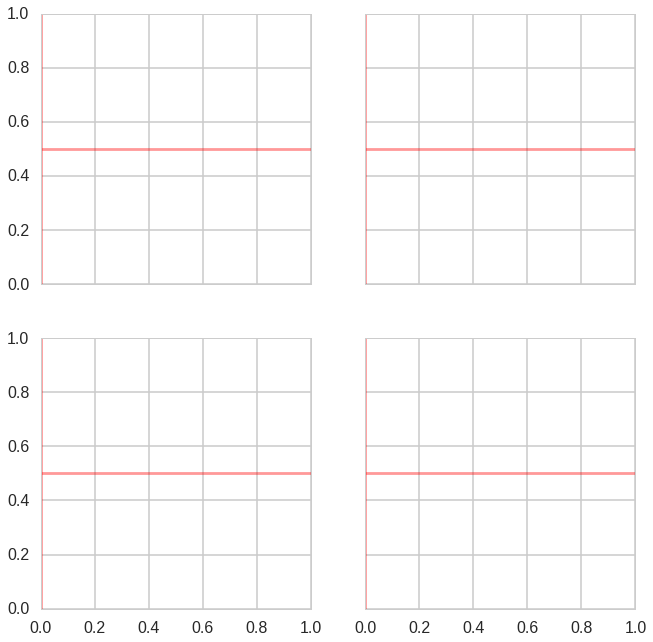

In [53]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.axvline(0, color='r', alpha=0.40)
ax1.axhline(0.5, color='r', alpha=0.40)

ax2.axvline(0, color='r', alpha=0.40)
ax2.axhline(0.5, color='r', alpha=0.40)

ax3.axvline(0, color='r', alpha=0.40)
ax3.axhline(0.5, color='r', alpha=0.40)

ax4.axvline(0, color='r', alpha=0.40)
ax4.axhline(0.5, color='r', alpha=0.40)

cis.plot('c_i_m', 'q5_theta_m', kind='scatter', ax=ax1, c='k', xlim=(-100, 100), title='Mated')
cis.plot('T_i_m', 'q5_theta_m', kind='scatter', ax=ax2, c='k', xlim=(-100, 100), title='Mated')
cis.plot('c_i_v', 'q5_theta_v', kind='scatter', ax=ax3, c='k', xlim=(-100, 100), title='Virgin')
cis.plot('T_i_v', 'q5_theta_v', kind='scatter', ax=ax4, c='k', xlim=(-100, 100), title='Virgin')

ax1.text(label_loc[0], label_loc[1], 'A', transform=ax1.transAxes, fontweight='bold')
ax2.text(label_loc[0], label_loc[1], 'B', transform=ax2.transAxes, fontweight='bold')
ax3.text(label_loc[0], label_loc[1], 'C', transform=ax3.transAxes, fontweight='bold')
ax4.text(label_loc[0], label_loc[1], 'D', transform=ax4.transAxes, fontweight='bold')

ax1.set_ylabel('Mean Allelic Imbalance')
ax3.set_xlabel('Cis Effects')
ax4.set_xlabel('Trans Effects')

plt.tight_layout(pad=2)
plt.savefig('../../output/AI_vs_cis_trans.eps')